### Dataset elegido "Students Performance in Exams" (Desempeño de los estudiantes en los exámenes)
* Analiza el rendimiento académico de los estudiantes y factores que lo afectan (ej: nivel educativo de los padres, tipo de alimentación, etc).

### Importacion de las librerias

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Lectura del CSV

In [168]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Creo la columna "pass_math"

In [169]:
df['pass_math'] = df['math score'].apply(lambda x: 1 if x>= 60 else 0)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


### Codificar variables categoricas

In [170]:
label_encoders = {}
categorical_cols = ['gender', 'lunch', 'parental level of education']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Seleccionar caracteristicas (x) y objetivo (y)

In [171]:
X = df[['gender', 'lunch', 'parental level of education', 'reading score', 'writing score']]
y = df['pass_math']

Escalar caracteristicas

In [172]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Dividir en traint/test (80% train, 20% test)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Construccion del modelo con keras

In [174]:
model = Sequential([
    Dense(1, activation="sigmoid", input_shape=(X_train.shape[1],))
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

c:\Users\Gasto\OneDrive\Desktop\Tarea\1er cuatri 2025\TPL3-python\RegresionKeras\env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [175]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4208 - loss: 0.9997 - val_accuracy: 0.4450 - val_loss: 0.9631
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4562 - loss: 0.9500 - val_accuracy: 0.4550 - val_loss: 0.9309
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4525 - loss: 0.9193 - val_accuracy: 0.4750 - val_loss: 0.8992
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4441 - loss: 0.8904 - val_accuracy: 0.4800 - val_loss: 0.8692
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4186 - loss: 0.8954 - val_accuracy: 0.4850 - val_loss: 0.8398
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4509 - loss: 0.8606 - val_accuracy: 0.5100 - val_loss: 0.8120
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4980 - loss: 0.8030 - val_accuracy: 0.5350 - val_loss: 0.7862
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5222 - loss: 0.7763 - val_accuracy: 0.5450 - val_loss: 0.7605
Epo

### Evaluacion y graficos

Grafico de precision

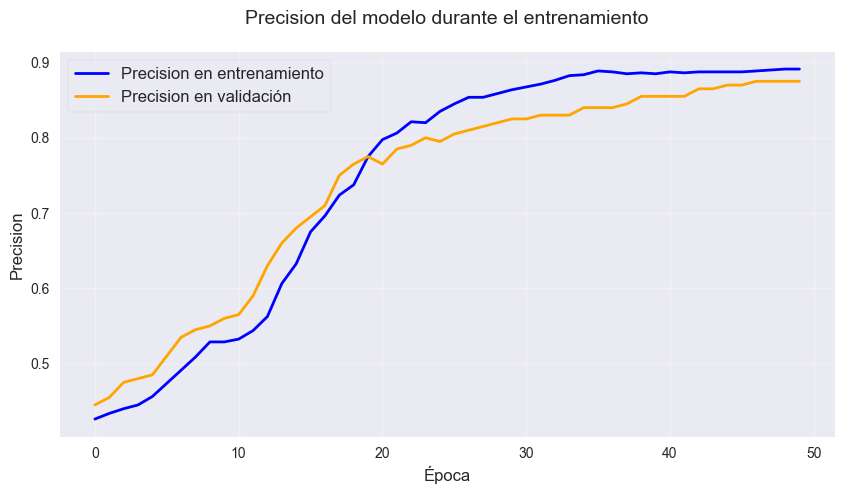

In [176]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Precision en entrenamiento', linewidth=2, color='blue')
plt.plot(history.history['val_accuracy'], label='Precision en validación', linewidth=2, color='orange')
plt.title('Precision del modelo durante el entrenamiento', fontsize=14, pad=20)
plt.ylabel('Precision', fontsize=12)
plt.xlabel('Época', fontsize=12)
plt.legend(fontsize=12, frameon=True)
plt.grid(True, alpha=0.3)
plt.show()


Grafico de perdida

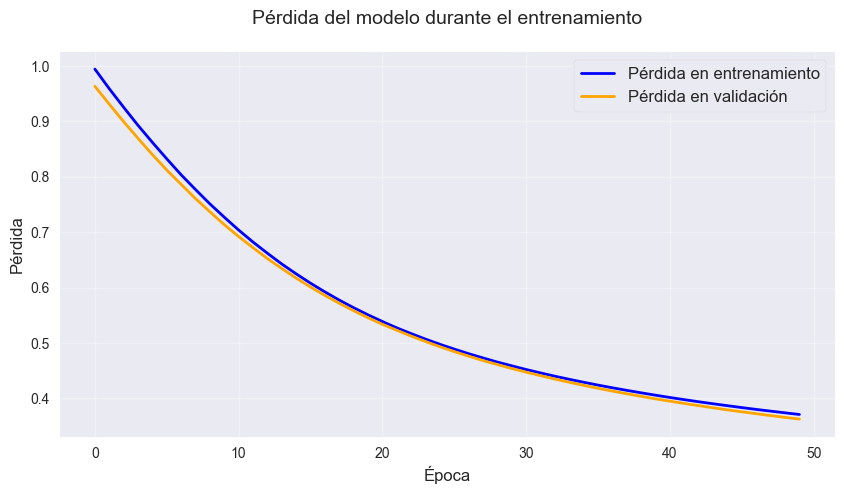

In [177]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento', linewidth=2, color='blue')
plt.plot(history.history['val_loss'], label='Pérdida en validación', linewidth=2, color='orange')
plt.title('Pérdida del modelo durante el entrenamiento', fontsize=14, pad=20)
plt.ylabel('Pérdida', fontsize=12)
plt.xlabel('Época', fontsize=12)
plt.legend(fontsize=12, frameon=True)
plt.grid(True, alpha=0.3)
plt.show()

Metricas finales

In [178]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {accuracy*100:.2f}%")

Precisión en test: 87.50%


### Guardo el modelo entrenado

In [179]:
import joblib

model.save("modelo_aprobacion.keras")

joblib.dump(scaler,"scaler.pkl")
joblib.dump(label_encoders,"label_encoders.pkl")

['label_encoders.pkl']

### Praparar nuevo dato para la prediccion

In [180]:
nuevo_estudiante = {
    'gender': "female",
    'lunch': "standard",
    'parental level of education': "bachelor's degree",
    'reading score': 85,
    'writing score': 90
}

Convertir a DataFrame

In [181]:
nuevo_df = pd.DataFrame([nuevo_estudiante])

Aplicar label encoding a las categorias (usando los encoders guardados)

In [182]:
for col in ['gender', 'lunch', 'parental level of education']:
    nuevo_df[col] = label_encoders[col].transform(nuevo_df[col])

Seleccionar y escalar las caracteristicas

In [183]:
X_nuevo = nuevo_df[['gender', 'lunch', 'parental level of education', 'reading score', 'writing score']]
X_nuevo = scaler.transform(X_nuevo)

### Resultado de la prediccion

In [185]:
probabilidad = model.predict(X_nuevo)[0][0] 
prediccion = 1 if probabilidad >= 0.5 else 0  

print(f"Probabilidad de aprobar matemáticas: {probabilidad*100:.2f}%")
print(f"Predicción: {'Aprueba' if prediccion == 1 else 'No aprueba'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Probabilidad de aprobar matemáticas: 86.18%
Predicción: Aprueba
